# Impact surface condition to car accidents

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_pickle("/Users/sdobron/skola/izv/project/izv-part03/izv-part03-var-nehody/accidents.pkl.gz")

In [2]:
df

,p1,p36,p37,p2a,weekday(p2a),p2b,p6,p7,p8,p9,...,l,n,o,p,q,r,s,t,p5a,region
0,002100160001,4,-1,2016-01-01,5,55,1,1,0,2,...,,711403,,Souhlasnýsesměremúseku,Pomalý,554782,451622,GN_V0.1UIR-ADR_410,1,PHA
1,002100160002,4,-1,2016-01-01,5,130,1,3,0,2,...,,,,,,-1,-1,,1,PHA
2,002100160003,5,-1,2016-01-01,5,100,1,2,0,2,...,,,,,,-1,-1,,1,PHA
3,002100160004,6,-1,2016-01-01,5,120,9,0,0,2,...,,,,,,-1,-1,,1,PHA
4,002100160005,6,-1,2016-01-01,5,2560,2,0,0,2,...,,,,,,-1,-1,,1,PHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572929,190906210457,6,-1,2021-08-30,1,506,2,0,0,2,...,,2611387,,,Pomalý,560359,-1,GN_V0.1UIR-ADR_410,1,KVK
572930,190906210458,6,-1,2021-08-30,1,752,2,0,0,2,...,,2541503,,Opačnýkesměruúseku,Pomalý,560383,550426,GN_V0.1UIR-ADR_410,1,KVK
572931,190906210459,3,2099,2021-08-30,1,1505,1,3,0,2,...,,,,,,-1,-1,,1,KVK
572932,190906210460,3,2099,2021-08-31,2,1245,0,0,0,1,...,2099,199764,,Opačnýkesměruúseku,Pomalý,560286,553654,GN_V0.1UIR-ADR_410,1,KVK


In [3]:
# filter entries without factory year entered
df["p16"] = pd.to_numeric(df["p16"], "coerce", "integer")  # "mark" invalid entries
df_y = df[((df["p16"].notnull()) & (0 <= df["p16"]) & (df["p16"] <= 9))]  # filter invalid entries

df_y

,p1,p36,p37,p2a,weekday(p2a),p2b,p6,p7,p8,p9,...,l,n,o,p,q,r,s,t,p5a,region
0,002100160001,4,-1,2016-01-01,5,55,1,1,0,2,...,,711403,,Souhlasnýsesměremúseku,Pomalý,554782,451622,GN_V0.1UIR-ADR_410,1,PHA
1,002100160002,4,-1,2016-01-01,5,130,1,3,0,2,...,,,,,,-1,-1,,1,PHA
2,002100160003,5,-1,2016-01-01,5,100,1,2,0,2,...,,,,,,-1,-1,,1,PHA
3,002100160004,6,-1,2016-01-01,5,120,9,0,0,2,...,,,,,,-1,-1,,1,PHA
4,002100160005,6,-1,2016-01-01,5,2560,2,0,0,2,...,,,,,,-1,-1,,1,PHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572929,190906210457,6,-1,2021-08-30,1,506,2,0,0,2,...,,2611387,,,Pomalý,560359,-1,GN_V0.1UIR-ADR_410,1,KVK
572930,190906210458,6,-1,2021-08-30,1,752,2,0,0,2,...,,2541503,,Opačnýkesměruúseku,Pomalý,560383,550426,GN_V0.1UIR-ADR_410,1,KVK
572931,190906210459,3,2099,2021-08-30,1,1505,1,3,0,2,...,,,,,,-1,-1,,1,KVK
572932,190906210460,3,2099,2021-08-31,2,1245,0,0,0,1,...,2099,199764,,Opačnýkesměruúseku,Pomalý,560286,553654,GN_V0.1UIR-ADR_410,1,KVK


In [118]:
road_conditions = ["Other", "Dry", "Dry (dirty)", "Wet", "Dirt on road", "Ice - gritted", "Ice - ungritted", "Spilled (gas, oil, ...)", "Ice coating", "Ice coating on the bridges"]
df_y["p16a"] = df_y.apply(lambda r: road_conditions[r["p16"]], axis=1)
df_ygroups = df_y.groupby("p16a")

print(df_ygroups["p1"].count().reset_index().sort_values("p1", ascending=False).style.to_latex())
print("Most expensive categories\n", df_ygroups["p14"].mean(numeric_only=True).sort_values(ascending=False).iloc[:2])

\begin{tabular}{llr}
 & p16a & p1 \\
1 & Dry & 422230 \\
9 & Wet & 120498 \\
4 & Ice - ungritted & 13279 \\
3 & Ice - gritted & 7018 \\
5 & Ice coating & 5553 \\
2 & Dry (dirty) & 2528 \\
7 & Other & 739 \\
0 & Dirt on road & 675 \\
6 & Ice coating on the bridges & 252 \\
8 & Spilled (gas, oil, ...) & 162 \\
\end{tabular}

Most expensive categories
 p16a
Spilled (gas, oil, ...)       910.382716
Ice coating on the bridges    861.369048
Name: p14, dtype: float64


In [5]:
df_y["p2a"] = pd.to_datetime(df['p2a'])
df_y["year"] = df_y["p2a"].dt.year

df_yygroups = df_y.groupby(["p16a", "year"])

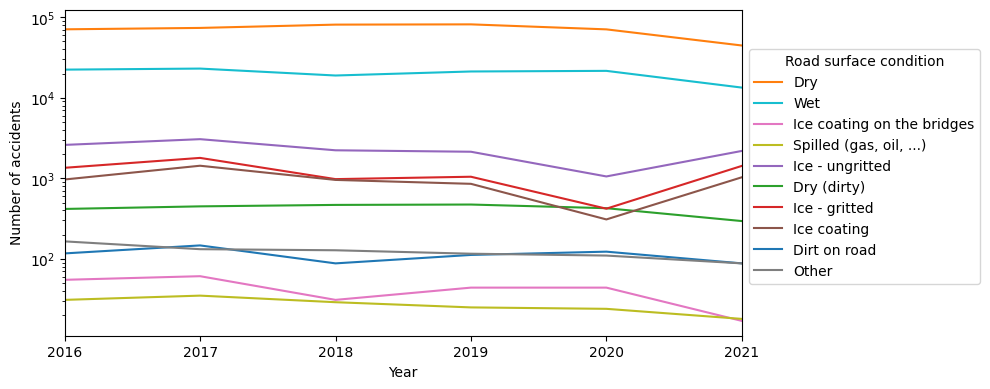

In [50]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot()
from matplotlib.ticker import ScalarFormatter
ax.yaxis.set_major_formatter(ScalarFormatter())

a = pd.crosstab(df_y['year'],df_y['p16a']).plot(ax=ax, logy=True, legend=False)

handles, labels = a.get_legend_handles_labels()
order = [7, 0, 5, 3, 2, 4, 8, 6, 9, 1]
order.reverse()
a.legend([handles[idx] for idx in order],[labels[idx] for idx in order] ,title='Road surface condition', bbox_to_anchor=(1, 0.9))
a.set_ylabel("Number of accidents")
a.set_xlabel("Year")
ax.margins(0, 0.05)
plt.tight_layout()
fig.savefig("surface_cond.png", bbox_inches="tight")

In [96]:
df_y = df_y[((df_y["p13a"].notnull()) & (df_y["p13b"].notnull()) & (df_y["p13b"].notnull()))]
icy_surface_accidents = df_y[((df_y["p16a"] == "Ice - ungritted") | (df_y["p16a"] == "Ice - gritted") | (df_y["p16a"] == "Ice coating") | (df_y["p16a"] == "Ice coating on the bridges"))]
icy_surface_accidents_len = len(icy_surface_accidents)

In [97]:
icy_surface_accidents_len

26102

In [98]:
fatal_icy_sur_accidents = icy_surface_accidents[icy_surface_accidents["p13a"] > 0]
hurt_icy_sur_accidents = icy_surface_accidents[icy_surface_accidents["p13c"] > 0]

In [101]:
len(fatal_icy_sur_accidents)/icy_surface_accidents_len*100, len(hurt_icy_sur_accidents)/icy_surface_accidents_len*100

(0.2949965519883534, 1.1723239598498199, 19.343345337522027)

In [109]:
dry_surface_accidents = df_y[((df_y["p16a"] == "Dry") | (df_y["p16a"] == "Dry (dirty)") | (df_y["p16a"] == "Wet"))]
dry_surface_accidents_len = len(dry_surface_accidents)

In [110]:
fatal_dry_sur_accidents = dry_surface_accidents[dry_surface_accidents["p13a"] > 0]
hurt_dry_sur_accidents = dry_surface_accidents[dry_surface_accidents["p13c"] > 0]

In [119]:
len(fatal_dry_sur_accidents)/dry_surface_accidents_len*100, len(hurt_dry_sur_accidents)/dry_surface_accidents_len*100

(0.47518963569405925, 18.30809748081635)